# Python Libraries

In [83]:
#importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Read In

In [84]:
#Read-in the dataset
game = pd.read_csv('/Users/priyachaudhuri/Desktop/SSB TERM 1/Data Science/online_gaming_behavior_dataset.csv')
game.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [85]:
# Display the summary information of the DataFrame including the data types of each column 
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [86]:
# Generate descriptive statistics. This method provides a quick overview of the numerical columns in the DataFrame
# count, mean, standard deviation, minimum, maximum, and the quartiles (25%, 50%, and 75%).
game.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [87]:
# There are no missing values in the dataset

# PlayerID -- Numerical identifier with no real statistical significance for analysis. Hence, can be a string instead of an integer.
# Convert PlayerID from int to string
game['PlayerID'] = game['PlayerID'].astype(str)

# InGamePurchases can be changed to Yes/ No values for clearer representation
# Change InGamePurchases from 0/1 to 'No'/'Yes'
game['InGamePurchases'] = game['InGamePurchases'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Verify the change
game['InGamePurchases'].value_counts()

# Make Age Groups

bins = [0, 18, 25, 35, 45, 50]
labels = ['<=18', '19-25', '26-35', '36-45', '46-50']
game['AgeGroup'] = pd.cut(game['Age'], bins=bins, labels=labels, right=False)


In [88]:
# Verify the change
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PlayerID                   40034 non-null  object  
 1   Age                        40034 non-null  int64   
 2   Gender                     40034 non-null  object  
 3   Location                   40034 non-null  object  
 4   GameGenre                  40034 non-null  object  
 5   PlayTimeHours              40034 non-null  float64 
 6   InGamePurchases            40034 non-null  object  
 7   GameDifficulty             40034 non-null  object  
 8   SessionsPerWeek            40034 non-null  int64   
 9   AvgSessionDurationMinutes  40034 non-null  int64   
 10  PlayerLevel                40034 non-null  int64   
 11  AchievementsUnlocked       40034 non-null  int64   
 12  EngagementLevel            40034 non-null  object  
 13  AgeGroup                   4003

In [89]:
# Check for duplicates

game.duplicated().value_counts()


False    40034
Name: count, dtype: int64

# Age/ Gender

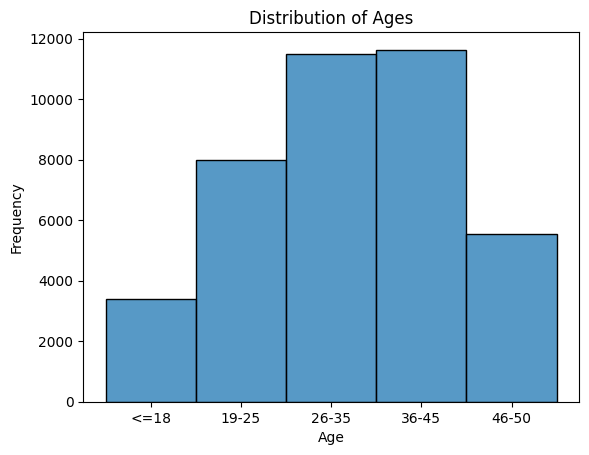

In [90]:
# Age Distribution
sns.histplot(game['AgeGroup'])
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# The age group '36-45' has the highest number of players, followed closely by '26-35'.
# The age group '<=18' has the lowest number of players

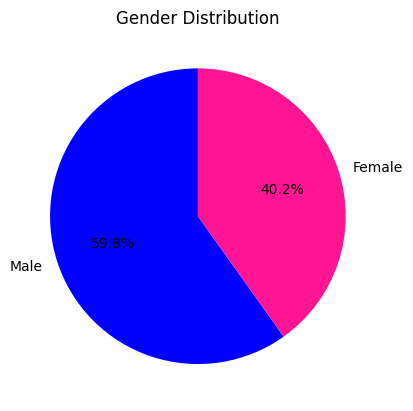

In [91]:
# Gender Distribution
game['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'deeppink'], startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

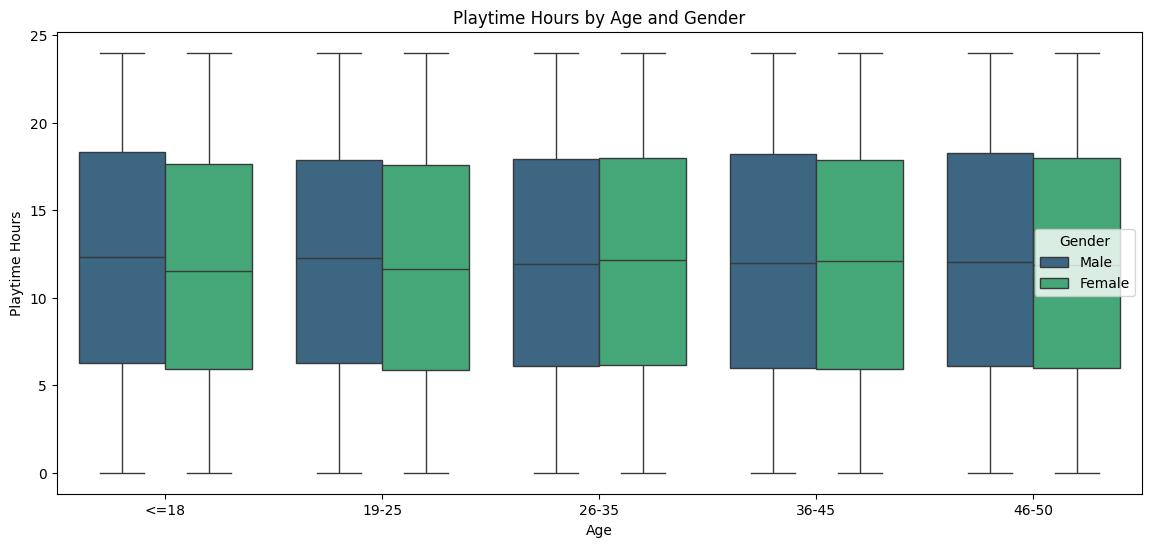

In [92]:
# Playtime Hours by Age and Gender
plt.figure(figsize=(14, 6))
sns.boxplot(x='AgeGroup', y='PlayTimeHours', hue='Gender', data=game, palette='viridis')
plt.title('Playtime Hours by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Playtime Hours')
plt.legend(title='Gender')
plt.show()

# The median playtime for most age groups hovers around 10 to 12 hours per week.
# There are no significant differences between male and female players in terms of playtime hours across different age groups.


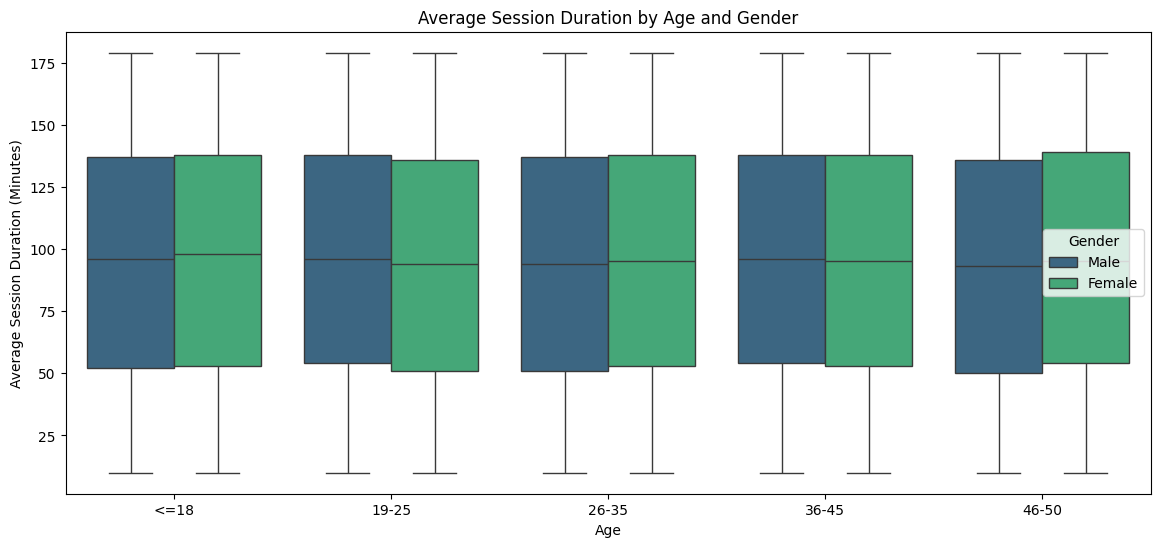

In [93]:

# Average Session Duration by Age and Gender
plt.figure(figsize=(14, 6))
sns.boxplot(x='AgeGroup', y='AvgSessionDurationMinutes', hue='Gender', data=game, palette='viridis')
plt.title('Average Session Duration by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Average Session Duration (Minutes)')
plt.legend(title='Gender')
plt.show()

# The median session duration for most age groups is around 90 to 110 minutes
# the variability in session duration is similar for male and female players
# players of all ages tend to engage with the game similarly in terms of session duration


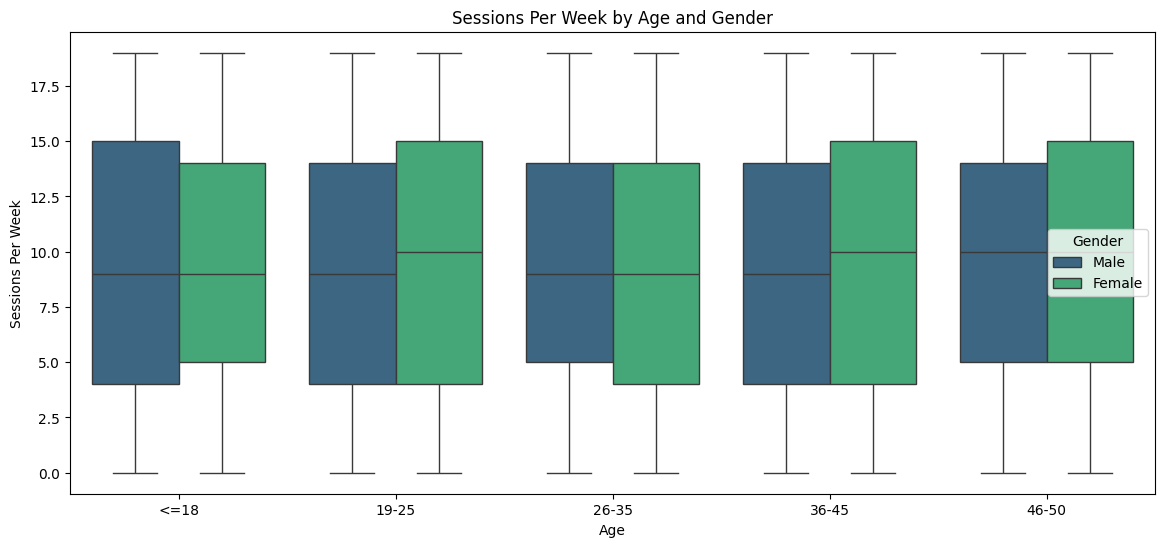

In [94]:

# Sessions Per Week by Age and Gender
plt.figure(figsize=(14, 6))
sns.boxplot(x='AgeGroup', y='SessionsPerWeek', hue='Gender', data=game, palette='viridis')
plt.title('Sessions Per Week by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Sessions Per Week')
plt.legend(title='Gender')
plt.show()

# The median sessions per week for most age groups hover around 8-10 sessions.



In [95]:
age_gen_sess = game.groupby(['AgeGroup', 'Gender'])['SessionsPerWeek'].describe()
age_gen_sess

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/2781551270.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gen_sess = game.groupby(['AgeGroup', 'Gender'])['SessionsPerWeek'].describe()


count      mean       std  min  25%   50%   75%   max
AgeGroup Gender                                                        
<=18     Female  1402.0  9.495720  5.823019  0.0  5.0   9.0  14.0  19.0
         Male    1986.0  9.399295  5.823446  0.0  4.0   9.0  15.0  19.0
19-25    Female  3179.0  9.505505  5.826543  0.0  4.0  10.0  15.0  19.0
         Male    4801.0  9.280775  5.763671  0.0  4.0   9.0  14.0  19.0
26-35    Female  4565.0  9.392333  5.767978  0.0  4.0   9.0  14.0  19.0
         Male    6929.0  9.498052  5.740996  0.0  5.0   9.0  14.0  19.0
36-45    Female  4667.0  9.564174  5.821526  0.0  4.0  10.0  15.0  19.0
         Male    6971.0  9.400086  5.720275  0.0  4.0   9.0  14.0  19.0
46-50    Female  2262.0  9.703802  5.812322  0.0  5.0  10.0  15.0  19.0
         Male    3272.0  9.668704  5.649794  0.0  5.0  10.0  14.0  19.0

In [96]:
# females in the 19-25 age group have a higher mean compared to males.
# the age group 46-50 shows slightly higher mean sessions per week for both genders, indicating higher engagement in this age group.

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/1644305046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GameGenre', y='Age', data=game, palette='viridis', ax=axs[0])


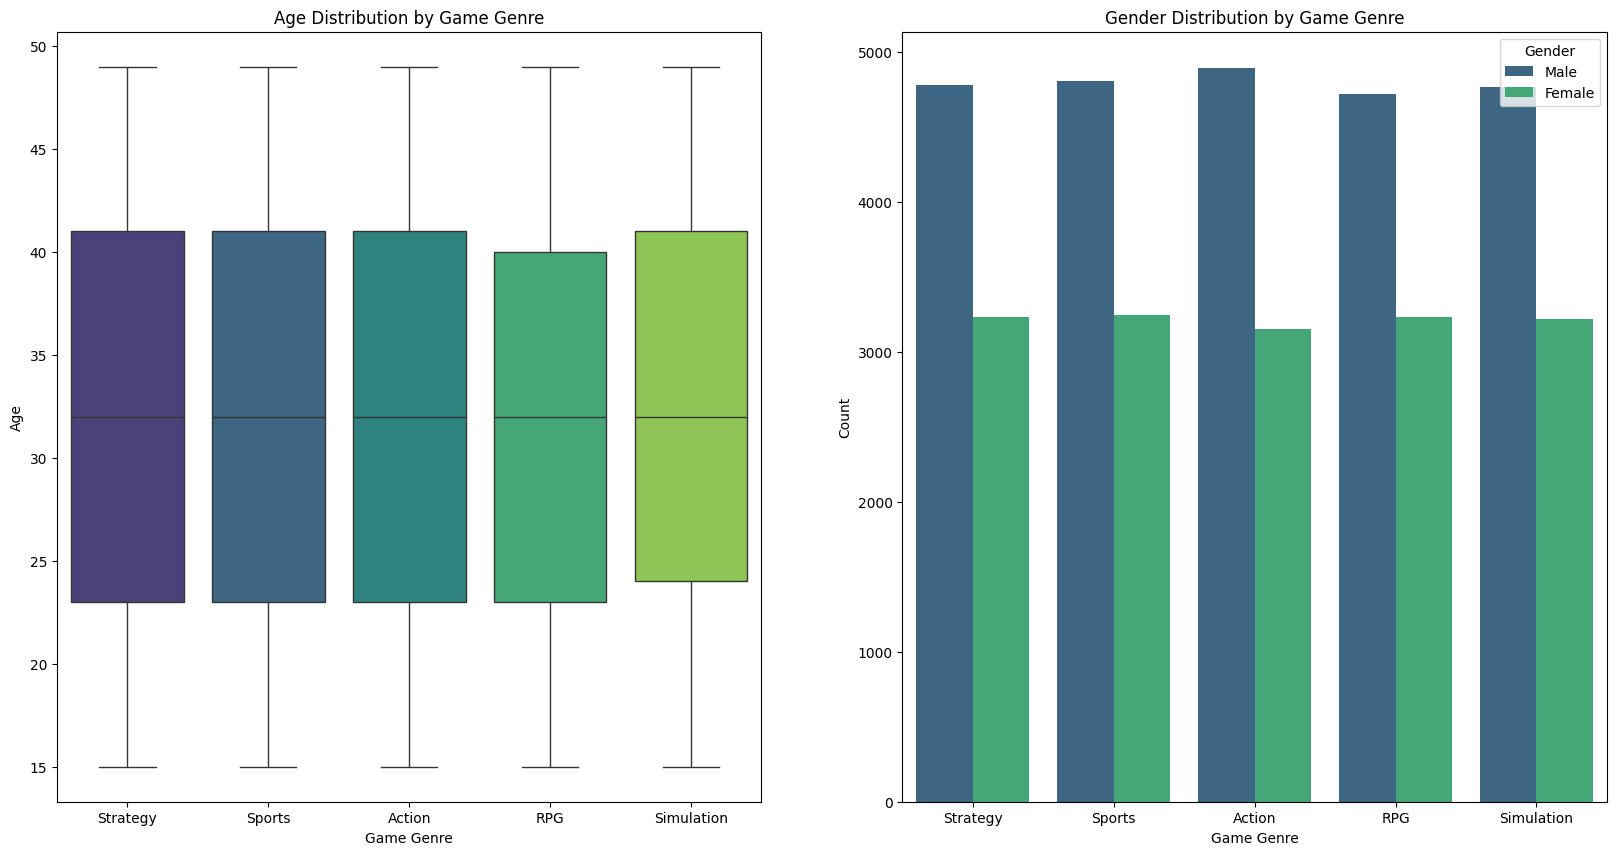

In [97]:
# Set up the figure and axes for a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Age Distribution by Game Genre
sns.boxplot(x='GameGenre', y='Age', data=game, palette='viridis', ax=axs[0])
axs[0].set_title('Age Distribution by Game Genre')
axs[0].set_xlabel('Game Genre')
axs[0].set_ylabel('Age')

# Gender Distribution by Game Genre
sns.countplot(x='GameGenre', hue='Gender', data=game, palette='viridis', ax=axs[1])
axs[1].set_title('Gender Distribution by Game Genre')
axs[1].set_xlabel('Game Genre')
axs[1].set_ylabel('Count')

plt.show()


In [98]:
# Values for the graphs look very close to each other -- summarise in counts

# Age vs Game Genre
playtime_englevel = game.groupby('GameGenre')['Age'].describe()
playtime_englevel


,count,mean,std,min,25%,50%,75%,max
GameGenre,,,,,,,,
Action,8039.0,31.952482,9.986865,15.0,23.0,32.0,41.0,49.0
RPG,7952.0,31.813003,10.080876,15.0,23.0,32.0,40.0,49.0
Simulation,7983.0,32.185895,10.094332,15.0,24.0,32.0,41.0,49.0
Sports,8048.0,31.994036,10.049423,15.0,23.0,32.0,41.0,49.0
Strategy,8012.0,32.016725,10.003780,15.0,23.0,32.0,41.0,49.0


In [99]:

# Gender by Game Genre
gender_genre = game.groupby(['GameGenre', 'Gender']).size().unstack(fill_value=0)
gender_genre

# RPG and Strategy games tend to attract slightly older players, while Sports games have a younger demographic
# Sports and Action games have a higher proportion of male players, while RPG and Strategy games have a more balanced gender distribution

Gender,Female,Male
GameGenre,,
Action,3149,4890
RPG,3235,4717
Simulation,3218,4765
Sports,3243,4805
Strategy,3230,4782


In [100]:
# Gender by Game Genre
gender_genre = game.groupby(['GameGenre', 'Gender']).size().unstack(fill_value=0)
gender_genre

# All game genres have a similar median age of 32 years.
# Simulation games having the highest mean age and RPG games having the lowest mean age.
# Action games have a higher proportion of male players (~60.8%), while RPG games have a slightly more balanced gender distribution compared to other genres. Sports, Simulation, and Strategy games have a similar gender distribution with males making up around 59.7% of players.

Gender,Female,Male
GameGenre,,
Action,3149,4890
RPG,3235,4717
Simulation,3218,4765
Sports,3243,4805
Strategy,3230,4782


# Location

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/2091985694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=game, palette='viridis')


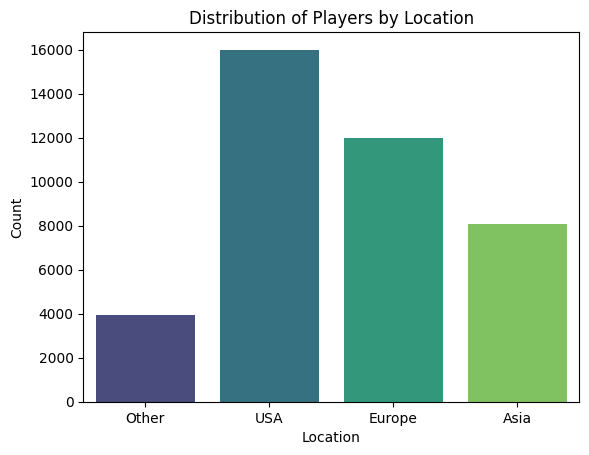

In [101]:
# Location Distribution
sns.countplot(x='Location', data=game, palette='viridis')
plt.title('Distribution of Players by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [102]:
# Location vs PlayTime
loc_playtime = game.groupby('Location')['PlayTimeHours'].describe()
loc_playtime

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Asia,8095.0,12.194502,6.958223,0.000158,6.171252,12.278865,18.208090,23.997245
Europe,12004.0,11.931396,6.879616,0.000115,6.034050,11.926281,17.863444,23.993926
Other,3935.0,12.060967,6.914991,0.007567,6.149607,12.079096,18.075330,23.999592
USA,16000.0,11.999035,6.917689,0.000630,6.013741,11.946785,17.940668,23.995123


In [103]:
# Location vs Avg Session
loc_avg = game.groupby('Location')['AvgSessionDurationMinutes'].describe()
loc_avg

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Asia,8095.0,94.836072,49.324001,10.0,52.0,95.0,138.0,179.0
Europe,12004.0,94.183106,48.587217,10.0,52.0,94.0,136.0,179.0
Other,3935.0,94.943837,49.442357,10.0,53.0,95.0,138.0,179.0
USA,16000.0,95.189813,49.063158,10.0,53.0,95.0,138.0,179.0


In [104]:
# Location vs Session per Week
loc_sess = game.groupby('Location')['SessionsPerWeek'].describe()
loc_sess

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Asia,8095.0,9.487832,5.748245,0.0,5.0,9.0,15.0,19.0
Europe,12004.0,9.482506,5.791810,0.0,4.0,9.0,15.0,19.0
Other,3935.0,9.442440,5.797566,0.0,4.0,9.0,14.0,19.0
USA,16000.0,9.462813,5.742391,0.0,4.0,9.0,14.0,19.0


In [105]:
# The mean and median number of sessions per week are very consistent across all locations, with all medians at 9 sessions per week.
# The similar session durations across different locations indicate that players, regardless of location, have comparable gaming habits when it comes to how long they play in a single session.
# Players from Other regions and the USA have similar mean and median playtime hours, with mean playtime hours slightly over 12 hours.

In [108]:
# Game Genre by Location
genre_loc = game.groupby(['GameGenre', 'Location']).size().unstack(fill_value=0)
genre_loc

Location,Asia,Europe,Other,USA
GameGenre,,,,
Action,1656,2428,792,3163
RPG,1620,2372,787,3173
Simulation,1623,2414,795,3151
Sports,1582,2431,775,3260
Strategy,1614,2359,786,3253


In [109]:
# Proportion seem similar with slight variations

# Genre

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/1562611582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GameGenre', data=game, palette='viridis')


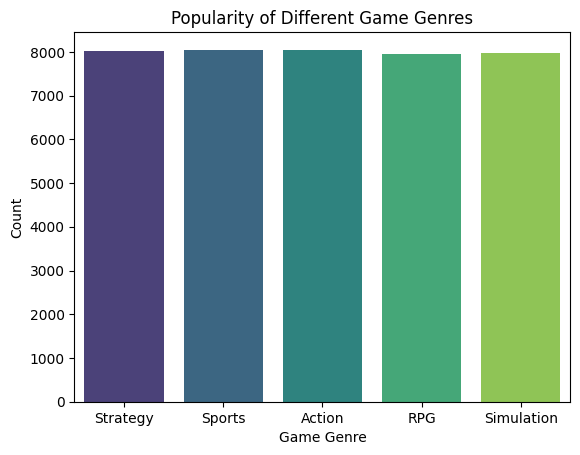

In [110]:
# Game Genre Popularity
sns.countplot(x='GameGenre', data=game, palette='viridis')
plt.title('Popularity of Different Game Genres')
plt.xlabel('Game Genre')
plt.ylabel('Count')
plt.show()

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/1336738944.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GameGenre', y='PlayTimeHours', data=game, palette='viridis', ax=axs[0])
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/1336738944.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GameGenre', y='SessionsPerWeek', data=game, palette='viridis', ax=axs[1])
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/1336738944.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GameGe

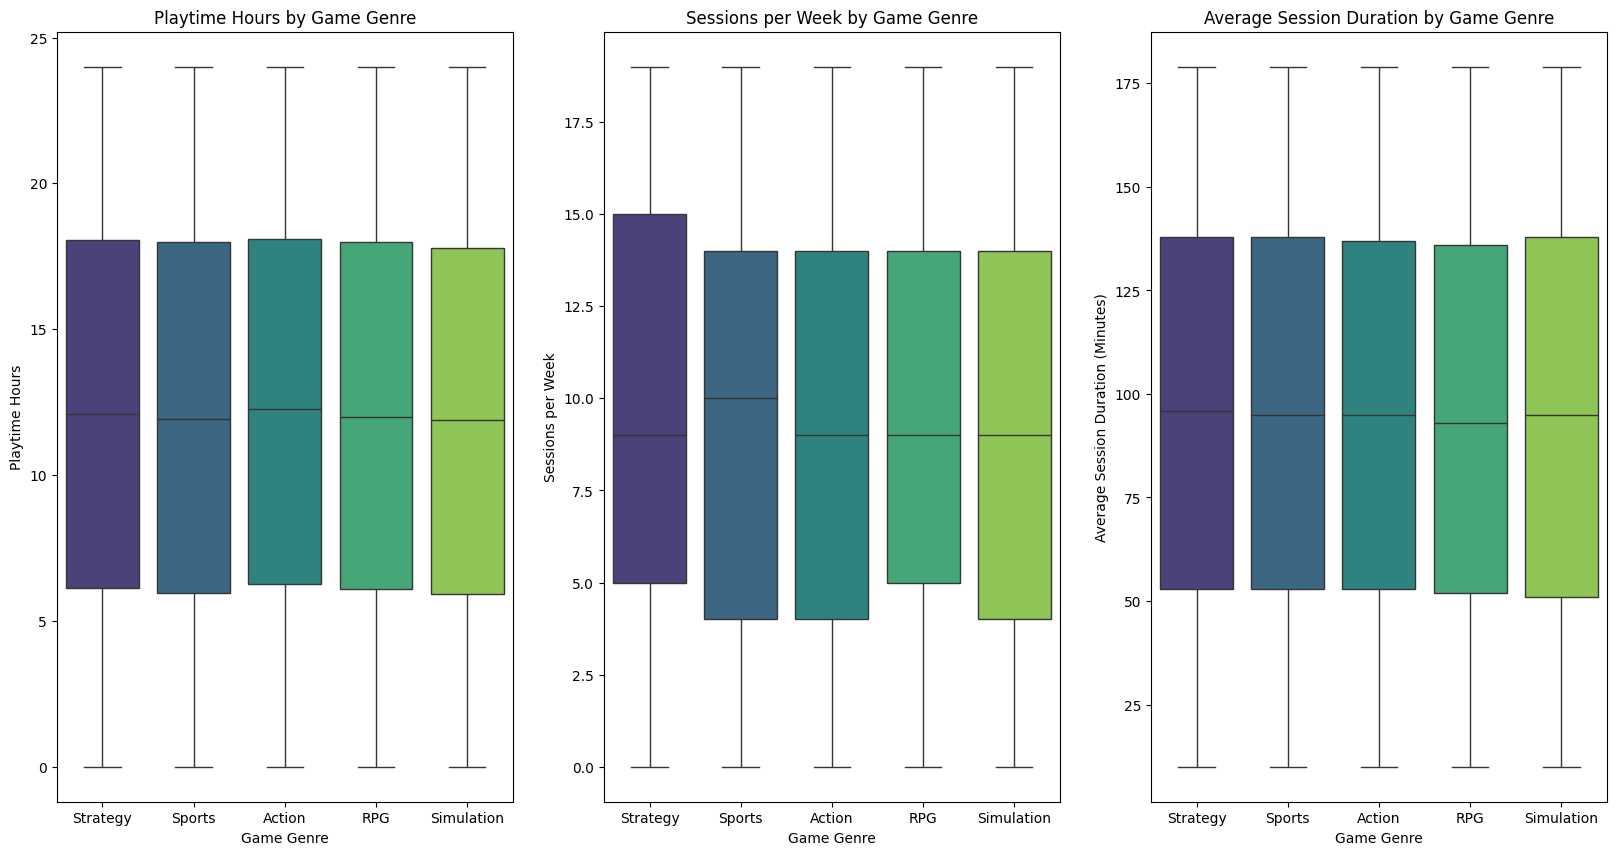

In [111]:
# GameGenre Analysis

# Set up the figure and axes for a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Playtime by Game Genre
sns.boxplot(x='GameGenre', y='PlayTimeHours', data=game, palette='viridis', ax=axs[0])
axs[0].set_title('Playtime Hours by Game Genre')
axs[0].set_xlabel('Game Genre')
axs[0].set_ylabel('Playtime Hours')

# Sessions per Week by Game Genre
sns.boxplot(x='GameGenre', y='SessionsPerWeek', data=game, palette='viridis', ax=axs[1])
axs[1].set_title('Sessions per Week by Game Genre')
axs[1].set_xlabel('Game Genre')
axs[1].set_ylabel('Sessions per Week')

# Average Session Duration by Game Genre
sns.boxplot(x='GameGenre', y='AvgSessionDurationMinutes', data=game, palette='viridis', ax=axs[2])
axs[2].set_title('Average Session Duration by Game Genre')
axs[2].set_xlabel('Game Genre')
axs[2].set_ylabel('Average Session Duration (Minutes)')

plt.show()


In [112]:
# Values for the graphs look very close to each other -- summarise in counts

# Playtime vs Game Genre
playtime_genre= game.groupby('GameGenre')['PlayTimeHours'].describe()
playtime_genre

,count,mean,std,min,25%,50%,75%,max
GameGenre,,,,,,,,
Action,8039.0,12.164645,6.879331,0.000630,6.268037,12.269403,18.078077,23.995739
RPG,7952.0,12.008113,6.915510,0.000158,6.106444,11.979067,17.987556,23.991246
Simulation,7983.0,11.898085,6.890893,0.000950,5.911342,11.897136,17.792838,23.999592
Sports,8048.0,11.968329,6.944544,0.003188,5.961856,11.909736,17.974933,23.997838
Strategy,8012.0,12.081855,6.941233,0.000115,6.126750,12.079734,18.041660,23.991985


In [113]:
# Avg Session vs Game Genre
sess_genre= game.groupby('GameGenre')['SessionsPerWeek'].describe()
sess_genre

,count,mean,std,min,25%,50%,75%,max
GameGenre,,,,,,,,
Action,8039.0,9.472820,5.782960,0.0,4.0,9.0,14.0,19.0
RPG,7952.0,9.405810,5.727377,0.0,5.0,9.0,14.0,19.0
Simulation,7983.0,9.440436,5.810046,0.0,4.0,9.0,14.0,19.0
Sports,8048.0,9.497391,5.746044,0.0,4.0,10.0,14.0,19.0
Strategy,8012.0,9.541687,5.751947,0.0,5.0,9.0,15.0,19.0


In [114]:
# Session per week vs Game Genre
avg_genre= game.groupby('GameGenre')['AvgSessionDurationMinutes'].describe()
avg_genre

,count,mean,std,min,25%,50%,75%,max
GameGenre,,,,,,,,
Action,8039.0,94.782933,48.955658,10.0,53.0,95.0,137.0,179.0
RPG,7952.0,93.741952,48.810232,10.0,52.0,93.0,136.0,179.0
Simulation,7983.0,94.739572,49.631877,10.0,51.0,95.0,138.0,179.0
Sports,8048.0,95.046098,48.719084,10.0,53.0,95.0,138.0,179.0
Strategy,8012.0,95.641538,48.929982,10.0,53.0,96.0,138.0,179.0


In [115]:
# Action and Strategy games have higher median playtime hours compared to other genres.
# Strategy games lead to more frequent gaming sessions, while RPG games have slightly fewer sessions per week compared to others.
# Strategy games have the highest median session duration, while RPG games have slightly lower median session durations compared to other genres.

# Player Level

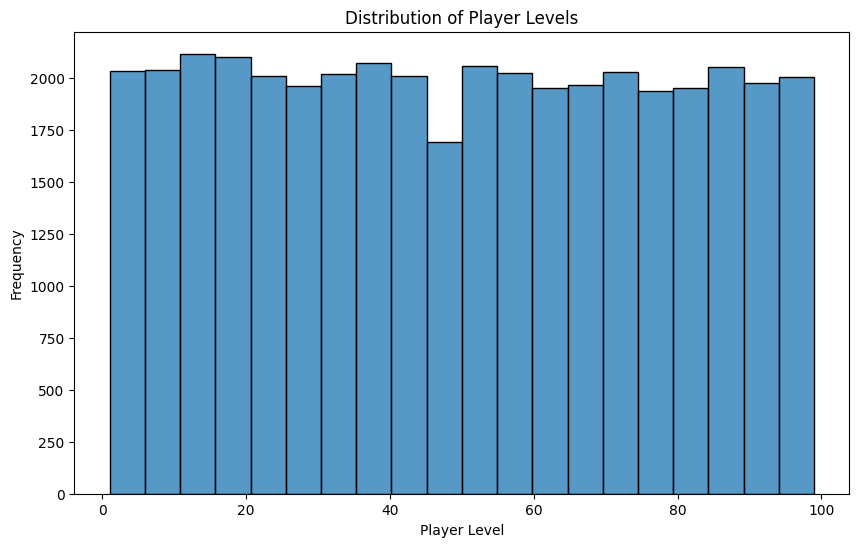

In [116]:
# Player Levels Distribution
plt.figure(figsize=(10, 6))
sns.histplot(game['PlayerLevel'], bins=20)
plt.title('Distribution of Player Levels')
plt.xlabel('Player Level')
plt.ylabel('Frequency')
plt.show()

In [117]:
# Define the bins and labels for the groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column for PlayerLevel groups
game['PlayerLevelGroup'] = pd.cut(game['PlayerLevel'], bins=bins, labels=labels, right=False)


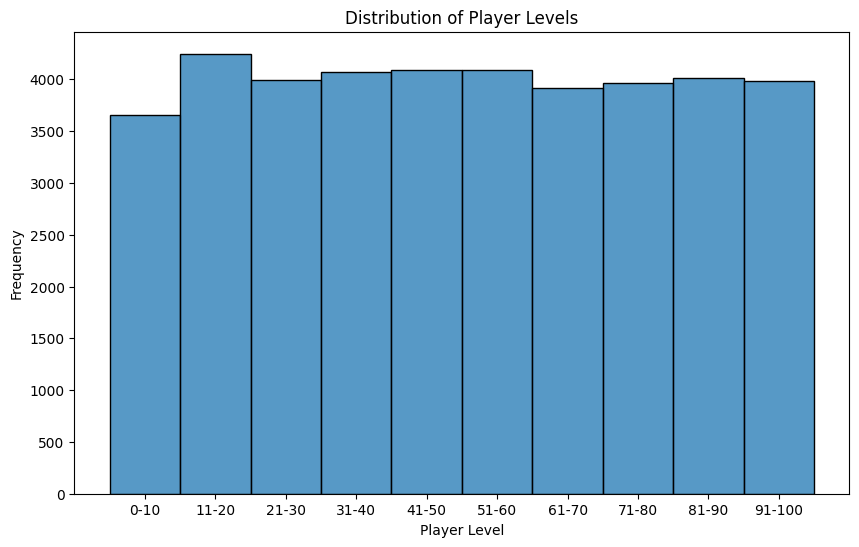

In [118]:
# Player Levels Distribution
plt.figure(figsize=(10, 6))
sns.histplot(game['PlayerLevelGroup'])
plt.title('Distribution of Player Levels')
plt.xlabel('Player Level')
plt.ylabel('Frequency')
plt.show()

# Achievement Unlocked

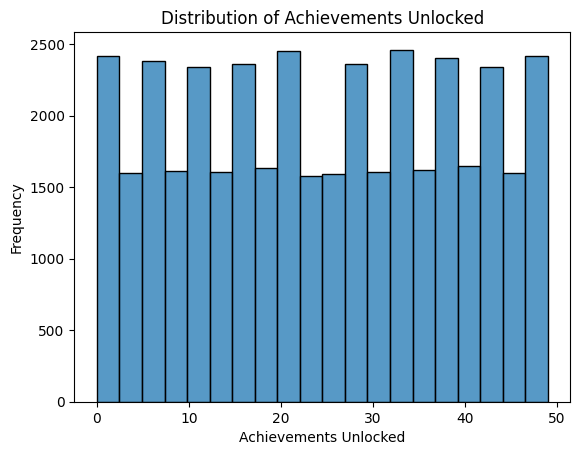

In [119]:
# Achievements Unlocked Distribution
sns.histplot(game['AchievementsUnlocked'], bins=20)
plt.title('Distribution of Achievements Unlocked')
plt.xlabel('Achievements Unlocked')
plt.ylabel('Frequency')
plt.show()

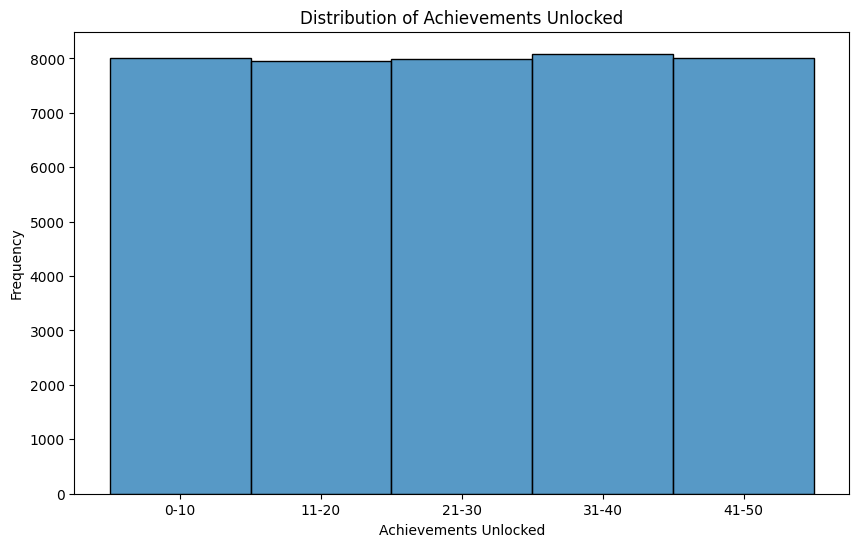

In [120]:
# Define the bins and labels for the groups
achievement_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
achievement_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column for Achievements Unlocked groups
game['AchievementGroup'] = pd.cut(game['AchievementsUnlocked'], bins=achievement_bins, labels=achievement_labels, right=False)

plt.figure(figsize=(10, 6))

sns.histplot(game['AchievementGroup'])
plt.title('Distribution of Achievements Unlocked')
plt.xlabel('Achievements Unlocked')
plt.ylabel('Frequency')
plt.show()


# Engagement Level

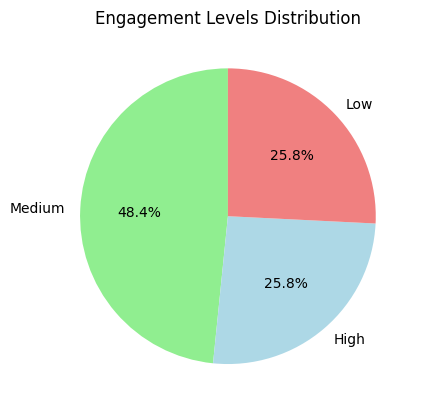

In [121]:
# Engagement Levels Distribution
game['EngagementLevel'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'], startangle=90)
plt.title('Engagement Levels Distribution')
plt.ylabel('')
plt.show()

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/1153269807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EngagementLevel', y='PlayerLevel', data=game, palette='viridis')


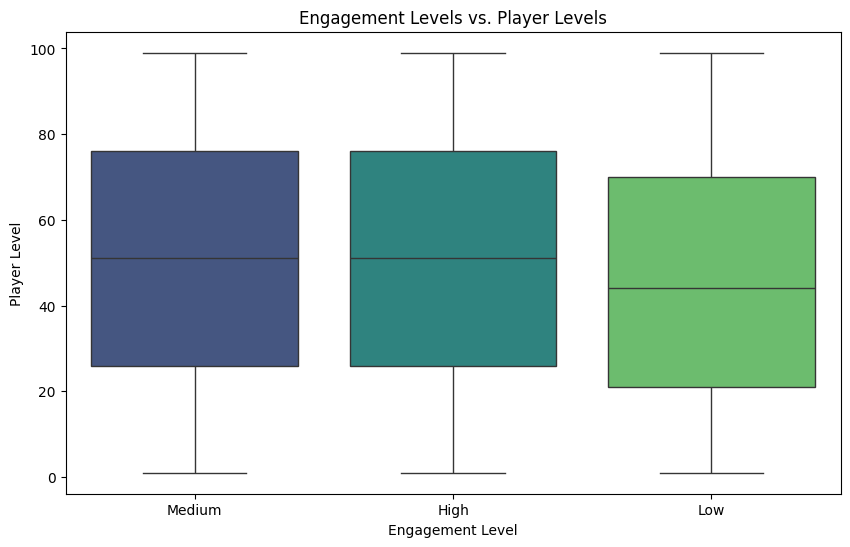

In [122]:
# Engagement Levels vs. Player Levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='EngagementLevel', y='PlayerLevel', data=game, palette='viridis')
plt.title('Engagement Levels vs. Player Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Player Level')
plt.show()

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/2600803198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EngagementLevel', y='PlayTimeHours', data=game, palette='viridis', ax=axs[0])
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/2600803198.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EngagementLevel', y='SessionsPerWeek', data=game, palette='viridis', ax=axs[1])
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/2600803198.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxpl

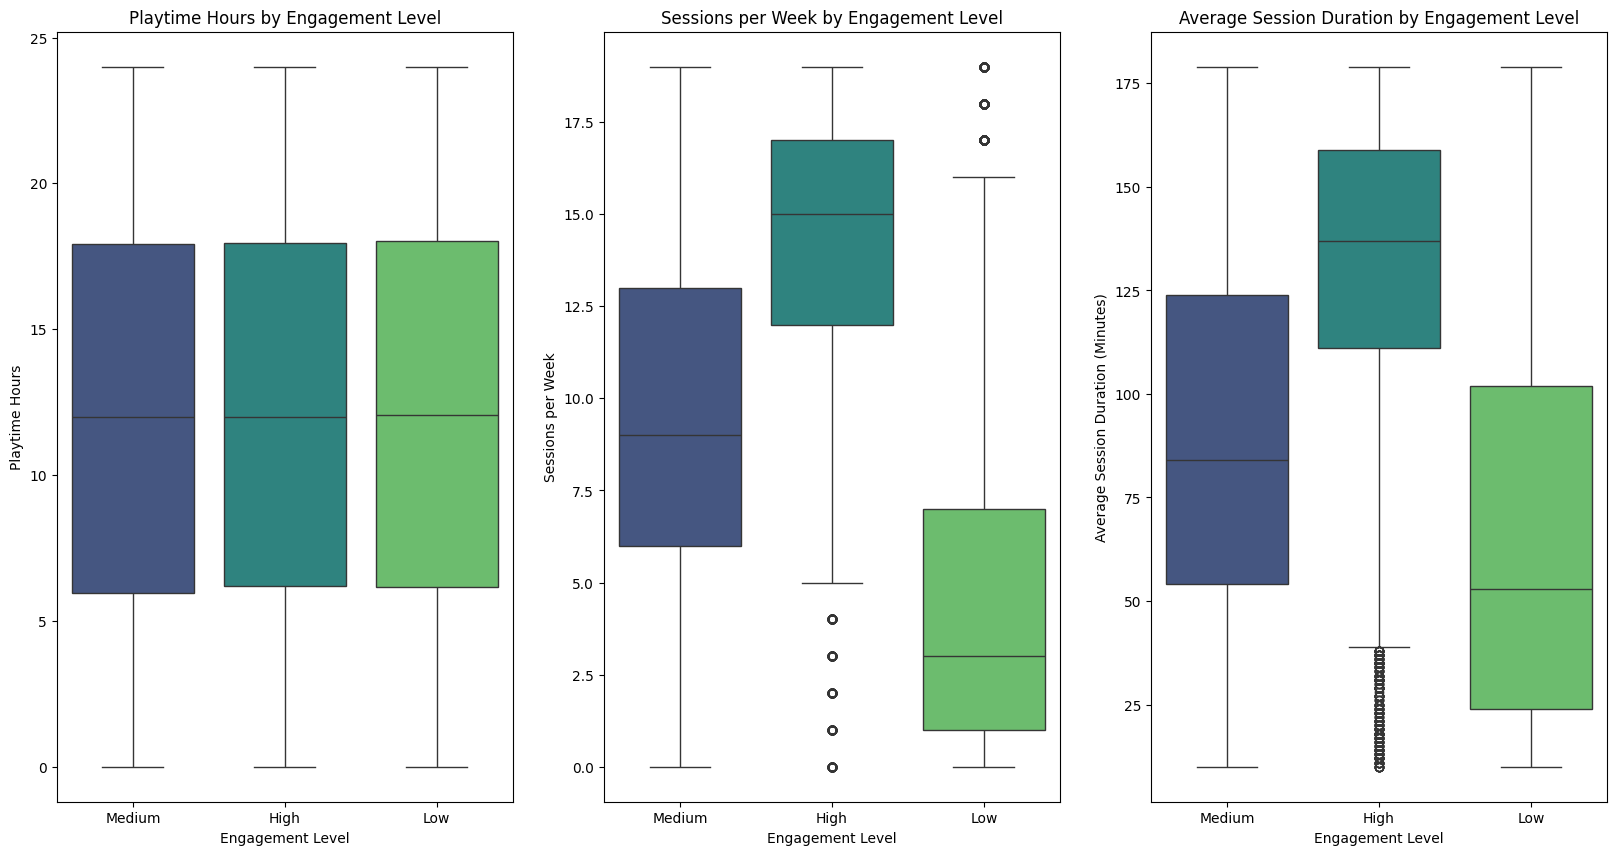

In [123]:
# Engagement Levels Analysis

# Set up the figure and axes for a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Playtime by Engagement Level
sns.boxplot(x='EngagementLevel', y='PlayTimeHours', data=game, palette='viridis', ax=axs[0])
axs[0].set_title('Playtime Hours by Engagement Level')
axs[0].set_xlabel('Engagement Level')
axs[0].set_ylabel('Playtime Hours')

# Sessions per Week by Engagement Level
sns.boxplot(x='EngagementLevel', y='SessionsPerWeek', data=game, palette='viridis', ax=axs[1])
axs[1].set_title('Sessions per Week by Engagement Level')
axs[1].set_xlabel('Engagement Level')
axs[1].set_ylabel('Sessions per Week')

# Average Session Duration by Engagement Level
sns.boxplot(x='EngagementLevel', y='AvgSessionDurationMinutes', data=game, palette='viridis', ax=axs[2])
axs[2].set_title('Average Session Duration by Engagement Level')
axs[2].set_xlabel('Engagement Level')
axs[2].set_ylabel('Average Session Duration (Minutes)')
plt.show()


In [124]:
# Values for the first graph looks very close to each other -- summarise

# Playtime vs Engagement Level
playtime_englevel = game.groupby('EngagementLevel')['PlayTimeHours'].describe()
playtime_englevel

# Players with low engagement levels have the highest mean playtime hours, followed closely by players with high engagement levels. Players with medium engagement levels have slightly lower mean playtime hours.
# High engagement levels correspond to more frequent gaming sessions per week.
# Players with higher engagement levels tend to have longer average session durations.

,count,mean,std,min,25%,50%,75%,max
EngagementLevel,,,,,,,,
High,10336.0,12.069238,6.914363,0.000630,6.192524,11.981024,17.958875,23.996857
Low,10324.0,12.104915,6.886693,0.000158,6.161530,12.074409,18.022752,23.997838
Medium,19374.0,11.957503,6.929335,0.000115,5.955822,11.992280,17.934651,23.999592


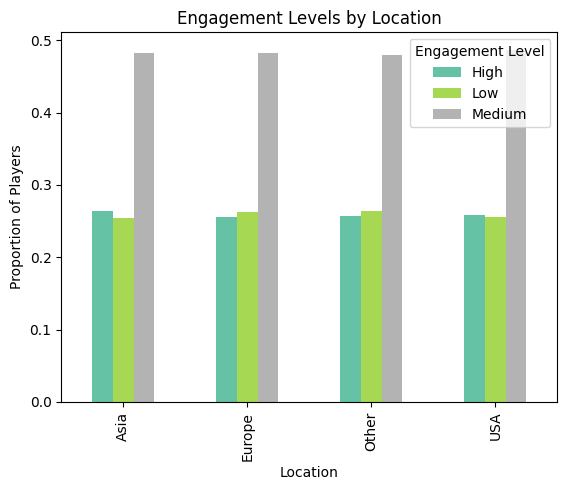

In [130]:

# Engagement Levels by Location
engagement_level_location = game.groupby('Location')['EngagementLevel'].value_counts(normalize=True).unstack().fillna(0)
engagement_level_location.plot(kind='bar', stacked=False, colormap='Set2')
plt.title('Engagement Levels by Location')
plt.xlabel('Location')
plt.ylabel('Proportion of Players')
plt.legend(title='Engagement Level')
plt.show()

In [ ]:
# Similar Trends
# Tailoring regional marketing strategies might help boost engagement in areas where Low engagement levels are more common.


In [126]:
# Engagement by Location
eng_loc = game.groupby(['EngagementLevel', 'Location']).size().unstack(fill_value=0)
eng_loc

Location,Asia,Europe,Other,USA
EngagementLevel,,,,
High,2131,3068,1010,4127
Low,2058,3143,1036,4087
Medium,3906,5793,1889,7786


In [ ]:
# Medium engagement levels are the most common in all regions, with around 48% of players falling into this category.

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/1976351371.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_by_gender_age = game.groupby(['Gender', 'AgeGroup'])['EngagementLevel'].value_counts().unstack()


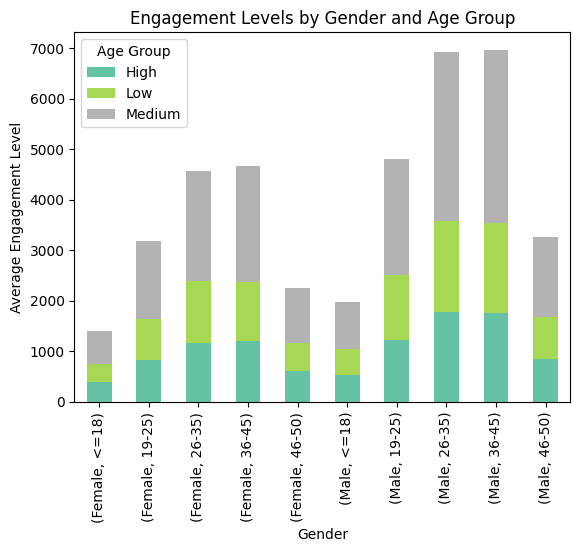

In [134]:
engagement_by_gender_age = game.groupby(['Gender', 'AgeGroup'])['EngagementLevel'].value_counts().unstack()
engagement_by_gender_age.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Engagement Levels by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Average Engagement Level')
plt.legend(title='Age Group')
plt.show()

In [ ]:
# Males, particularly in the 26-35 and 36-45 age groups, are the most engaged players. 
# target with marketing efforts and content tailored to their preferences

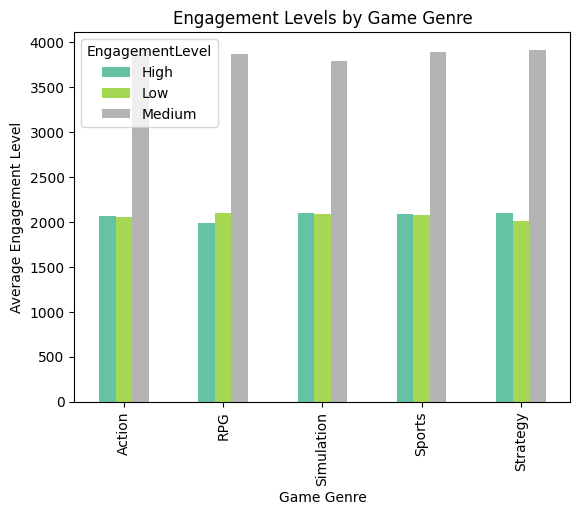

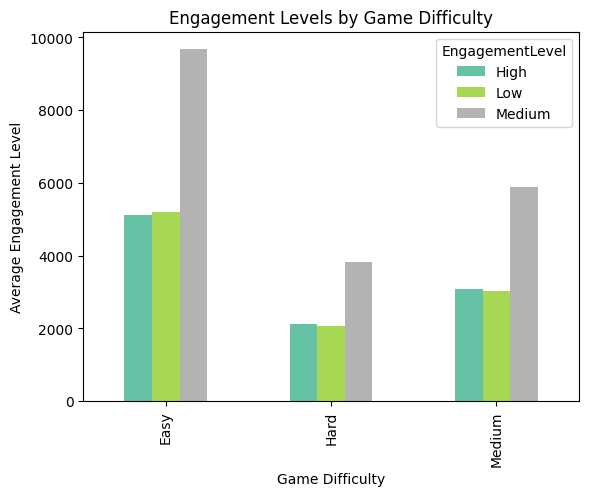

In [138]:
engagement_by_genre = game.groupby('GameGenre')['EngagementLevel'].value_counts().unstack()
engagement_by_difficulty = game.groupby('GameDifficulty')['EngagementLevel'].value_counts().unstack()

engagement_by_genre.plot(kind='bar', colormap='Set2')
plt.title('Engagement Levels by Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Average Engagement Level')
plt.show()

engagement_by_difficulty.plot(kind='bar', colormap='Set2')
plt.title('Engagement Levels by Game Difficulty')
plt.xlabel('Game Difficulty')
plt.ylabel('Average Engagement Level')
plt.show()


In [ ]:
# RPGs tend to engage players more effectively (immersive and interactive nature)
# Players tend to show higher engagement with games that are of easy difficulty. 
# less challenging games might retain players better


# Correlation

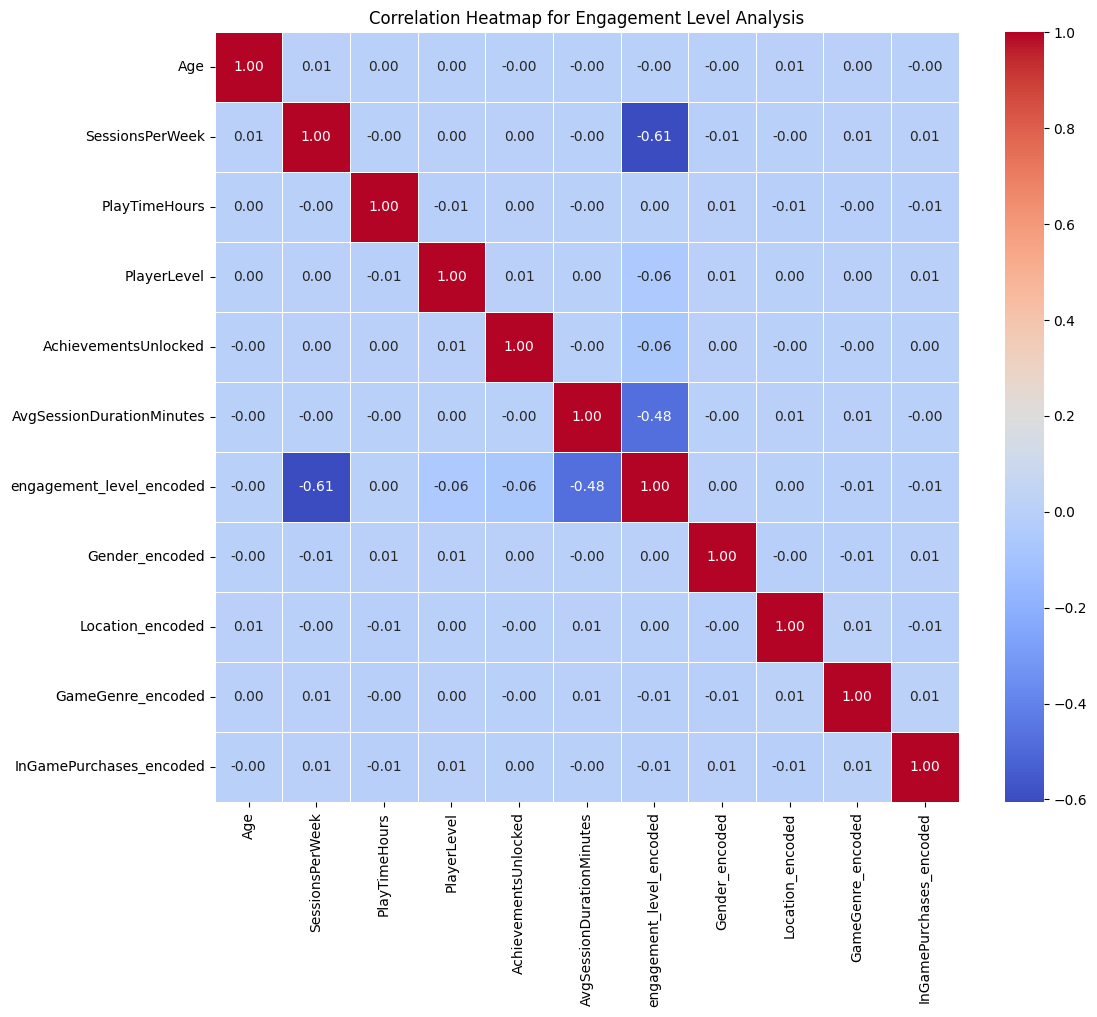

In [141]:
# Encoding categorical variables
game['Gender_encoded'] = game['Gender'].astype('category').cat.codes
game['Location_encoded'] = game['Location'].astype('category').cat.codes
game['GameGenre_encoded'] = game['GameGenre'].astype('category').cat.codes
game['InGamePurchases_encoded'] = game['InGamePurchases'].astype('category').cat.codes

# Selecting relevant columns for the heatmap
columns_for_heatmap = [
    'Age', 'SessionsPerWeek', 'PlayTimeHours', 'PlayerLevel', 
    'AchievementsUnlocked', 'AvgSessionDurationMinutes', 'engagement_level_encoded',
    'Gender_encoded', 'Location_encoded', 'GameGenre_encoded', 'InGamePurchases_encoded'
]

# Creating a correlation matrix
correlation_matrix = game[columns_for_heatmap].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Engagement Level Analysis')
plt.show()

# InGame Purchase

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/103412331.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='InGamePurchases', y='PlayTimeHours', data=game, palette='viridis', ax=axs[1])
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_74678/103412331.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='InGamePurchases', y='PlayerLevel', data=game, palette='viridis', ax=axs[2])


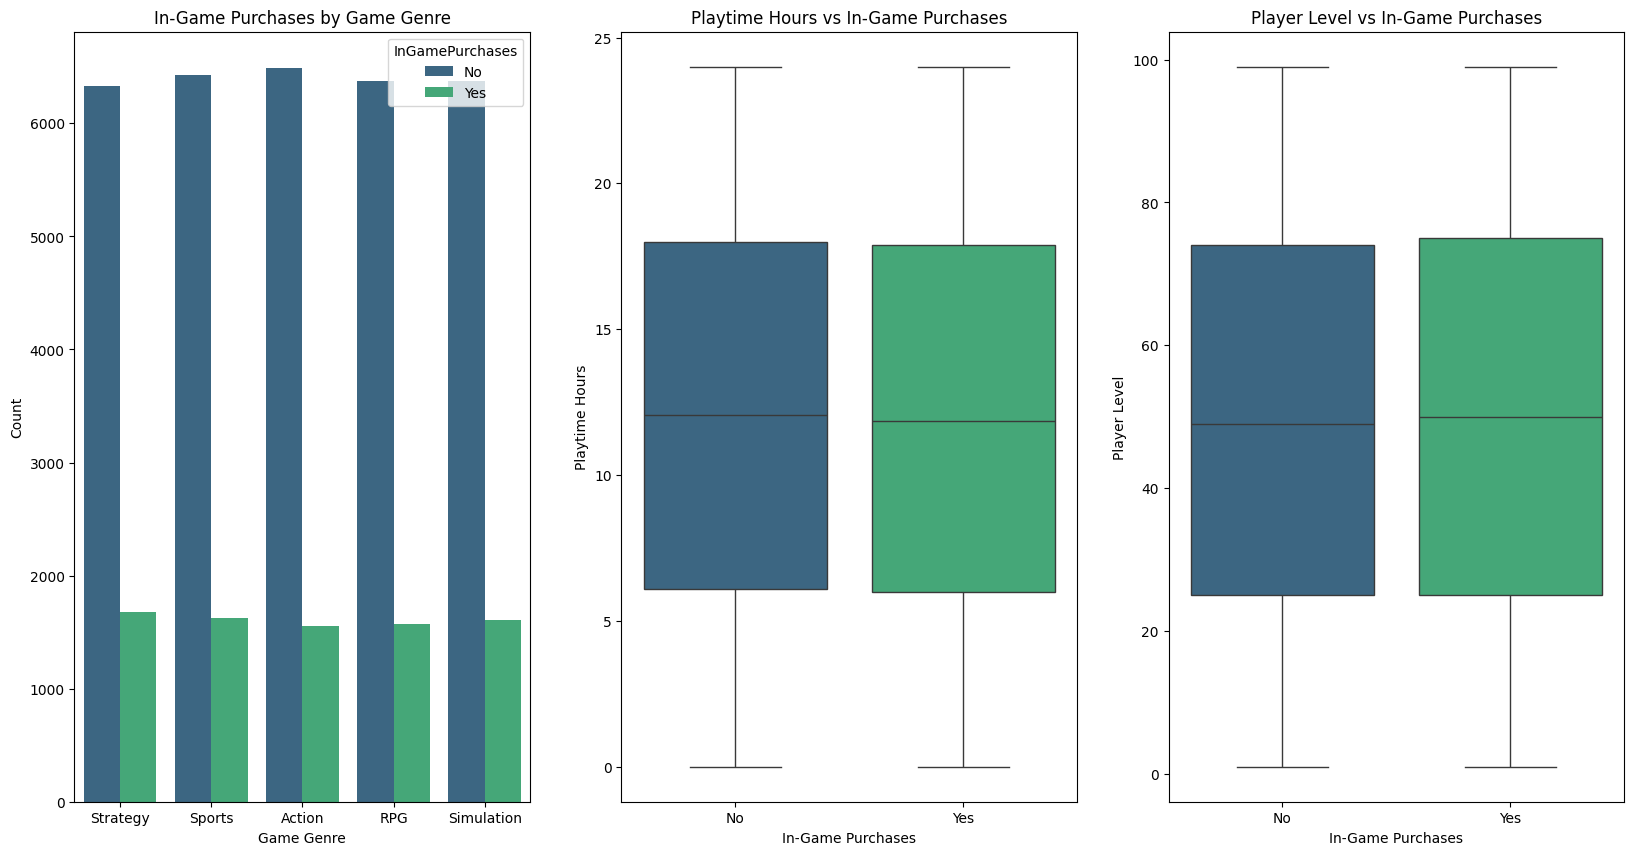

In [51]:
# In-Game Purchases Analysis

# Set up the figure and axes for a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# In-Game Purchases by Game Genre
sns.countplot(x='GameGenre', hue='InGamePurchases', data=game, palette='viridis', ax=axs[0])
axs[0].set_title('In-Game Purchases by Game Genre')
axs[0].set_xlabel('Game Genre')
axs[0].set_ylabel('Count')

# Playtime vs In-Game Purchases
sns.boxplot(x='InGamePurchases', y='PlayTimeHours', data=game, palette='viridis', ax=axs[1])
axs[1].set_title('Playtime Hours vs In-Game Purchases')
axs[1].set_xlabel('In-Game Purchases')
axs[1].set_ylabel('Playtime Hours')

# Player Level vs In-Game Purchases
sns.boxplot(x='InGamePurchases', y='PlayerLevel', data=game, palette='viridis', ax=axs[2])
axs[2].set_title('Player Level vs In-Game Purchases')
axs[2].set_xlabel('In-Game Purchases')
axs[2].set_ylabel('Player Level')

plt.show()


In [52]:
# The values look very close to each other -- breaking it down as summary


In [53]:

# In-Game Purchases by Game Genre
in_game_purchases_genre = game.groupby(['GameGenre', 'InGamePurchases']).size().unstack(fill_value=0)
in_game_purchases_genre


InGamePurchases,No,Yes
GameGenre,,
Action,6486,1553
RPG,6376,1576
Simulation,6373,1610
Sports,6426,1622
Strategy,6332,1680


In [54]:
# Playtime vs In-Game Purchases
playtime_purchases = game.groupby('InGamePurchases')['PlayTimeHours'].describe()
playtime_purchases

,count,mean,std,min,25%,50%,75%,max
InGamePurchases,,,,,,,,
No,31993.0,12.045395,6.917056,0.000158,6.090905,12.061993,17.985337,23.999592
Yes,8041.0,11.940694,6.904805,0.000115,5.990714,11.854957,17.883685,23.997245


In [55]:
# Player Level vs In-Game Purchases
level_purchases = game.groupby('InGamePurchases')['PlayerLevel'].describe()
level_purchases

,count,mean,std,min,25%,50%,75%,max
InGamePurchases,,,,,,,,
No,31993.0,49.562060,28.551690,1.0,25.0,49.0,74.0,99.0
Yes,8041.0,50.027609,28.732658,1.0,25.0,50.0,75.0,99.0


In [56]:
# Strategy games have the highest number of in-game purchases, while Action games have the lowest.
# The difference in mean and median playtime hours between players who make in-game purchases and those who do not is minimal, indicating that playtime is relatively similar regardless of in-game purchases.
# Players who make in-game purchases tend to have slightly higher player levels, suggesting a potential correlation between spending and game progression.

# High Engagement Level Analysis - Prerna

In [57]:
# Mapping dictionary
engagement_mapping = {'High': 1, 'Medium': 2, 'Low': 3}

# Encoding the engagement levels
game['engagement_level_encoded'] = game['EngagementLevel'].map(engagement_mapping)
print("\nEncoded DataFrame:")
print(game)


Encoded DataFrame:
      PlayerID  Age  Gender Location   GameGenre  PlayTimeHours  \
0         9000   43    Male    Other    Strategy      16.271119   
1         9001   29  Female      USA    Strategy       5.525961   
2         9002   22  Female      USA      Sports       8.223755   
3         9003   35    Male      USA      Action       5.265351   
4         9004   33    Male   Europe      Action      15.531945   
...        ...  ...     ...      ...         ...            ...   
40029    49029   32    Male      USA    Strategy      20.619662   
40030    49030   44  Female    Other  Simulation      13.539280   
40031    49031   15  Female      USA         RPG       0.240057   
40032    49032   34    Male      USA      Sports      14.017818   
40033    49033   19    Male      USA      Sports      10.083804   

      InGamePurchases GameDifficulty  SessionsPerWeek  \
0                  No         Medium                6   
1                  No         Medium                5   
2   

In [58]:
game

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,AgeGroup,PlayerLevelGroup,AchievementGroup,engagement_level_encoded
0,9000,43,Male,Other,Strategy,16.271119,No,Medium,6,108,79,25,Medium,36-45,71-80,21-30,2
1,9001,29,Female,USA,Strategy,5.525961,No,Medium,5,144,11,10,Medium,26-35,11-20,11-20,2
2,9002,22,Female,USA,Sports,8.223755,No,Easy,16,142,35,41,High,19-25,31-40,41-50,1
3,9003,35,Male,USA,Action,5.265351,Yes,Easy,9,85,57,47,Medium,36-45,51-60,41-50,2
4,9004,33,Male,Europe,Action,15.531945,No,Medium,2,131,95,37,Medium,26-35,91-100,31-40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,No,Easy,4,75,85,14,Medium,26-35,81-90,11-20,2
40030,49030,44,Female,Other,Simulation,13.539280,No,Hard,19,114,71,27,High,36-45,71-80,21-30,1
40031,49031,15,Female,USA,RPG,0.240057,Yes,Easy,10,176,29,1,High,<=18,21-30,0-10,1
40032,49032,34,Male,USA,Sports,14.017818,Yes,Medium,3,128,70,10,Medium,26-35,71-80,11-20,2


In [59]:
game.groupby('Location').engagement_level_encoded.value_counts() # engagement level in different location

Location  engagement_level_encoded
Asia      2                           3906
          1                           2131
          3                           2058
Europe    2                           5793
          3                           3143
          1                           3068
Other     2                           1889
          3                           1036
          1                           1010
USA       2                           7786
          1                           4127
          3                           4087
Name: count, dtype: int64

In [60]:
game[['Location', 'engagement_level_encoded']].groupby(['Location'], as_index=False).mean() 

,Location,engagement_level_encoded
0,Asia,1.990982
1,Europe,2.006248
2,Other,2.006607
3,USA,1.997500


In [61]:
high_engagement_users = game[game['EngagementLevel'] == 'High']

In [63]:
high_engagement_counts_location = high_engagement_users['Location'].value_counts()
high_engagement_counts_location

Location
USA       4127
Europe    3068
Asia      2131
Other     1010
Name: count, dtype: int64

In [64]:
high_engagement_counts_gender = high_engagement_users['Gender'].value_counts()
high_engagement_counts_gender

Gender
Male      6140
Female    4196
Name: count, dtype: int64

In [65]:
high_engagement_counts_genre = high_engagement_users['GameGenre'].value_counts()
high_engagement_counts_genre

GameGenre
Simulation    2104
Strategy      2097
Sports        2083
Action        2064
RPG           1988
Name: count, dtype: int64

In [66]:
high_engagement_counts_ingamepurchases = high_engagement_users['InGamePurchases'].value_counts()
high_engagement_counts_ingamepurchases

InGamePurchases
No     8202
Yes    2134
Name: count, dtype: int64

In [67]:
high_engagement_counts_difficulty = high_engagement_users['GameDifficulty'].value_counts()
high_engagement_counts_difficulty

GameDifficulty
Easy      5132
Medium    3092
Hard      2112
Name: count, dtype: int64

In [68]:
game.groupby('Gender').engagement_level_encoded.value_counts() # engagement level in different gender

Gender  engagement_level_encoded
Female  2                            7758
        1                            4196
        3                            4121
Male    2                           11616
        3                            6203
        1                            6140
Name: count, dtype: int64

In [69]:
game[['Gender', 'engagement_level_encoded']].groupby(['Gender'], as_index=False).mean() 

,Gender,engagement_level_encoded
0,Female,1.995334
1,Male,2.002629


In [70]:
game.groupby('GameGenre').engagement_level_encoded.value_counts() # engagement level in different gender

GameGenre   engagement_level_encoded
Action      2                           3916
            1                           2064
            3                           2059
RPG         2                           3867
            3                           2097
            1                           1988
Simulation  2                           3791
            1                           2104
            3                           2088
Sports      2                           3891
            1                           2083
            3                           2074
Strategy    2                           3909
            1                           2097
            3                           2006
Name: count, dtype: int64

In [71]:
game[['GameGenre', 'engagement_level_encoded']].groupby(['GameGenre'], as_index=False).mean() 

,GameGenre,engagement_level_encoded
0,Action,1.999378
1,RPG,2.013707
2,Simulation,1.997996
3,Sports,1.998882
4,Strategy,1.988642


In [72]:
game.groupby('GameDifficulty').engagement_level_encoded.value_counts() # engagement level in different gamedifficulty

GameDifficulty  engagement_level_encoded
Easy            2                           9677
                3                           5206
                1                           5132
Hard            2                           3820
                1                           2112
                3                           2076
Medium          2                           5877
                1                           3092
                3                           3042
Name: count, dtype: int64

In [73]:
game[['GameDifficulty', 'engagement_level_encoded']].groupby(['GameDifficulty'], as_index=False).mean() 

,GameDifficulty,engagement_level_encoded
0,Easy,2.003697
1,Hard,1.995504
2,Medium,1.995837


In [74]:
game.AvgSessionDurationMinutes.mean() # calculating the average session length

94.79225158615178

In [76]:
average_session_length = high_engagement_users['AvgSessionDurationMinutes'].mean()
average_session_length

131.92182662538698

In [77]:
low_engagement_users = game[game['EngagementLevel'] == 'Low']

In [79]:
average_session_length_low_engagement = low_engagement_users['AvgSessionDurationMinutes'].mean()
average_session_length_low_engagement

66.88211933359163

# Depends on how we want Age Group

In [80]:
high_engagement_counts = high_engagement_users['Age_Group'].value_counts()
high_engagement_counts

KeyError: 'Age_Group'

# contd

In [82]:
high_engagement_counts_gender = high_engagement_users['Gender'].value_counts()
high_engagement_counts_gender

Gender
Male      6140
Female    4196
Name: count, dtype: int64